http://store.steampowered.com/app/730/

In [51]:
import requests
import time
from IPython.display import HTML
import numpy as np
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [41]:
def get_steam_page(number):
#     n = np.random.randint(number, number+100000)
    url = 'http://store.steampowered.com/app/' + str(number)
    response = requests.get(url)
    time.sleep(3)
    if response.ok:
        return (number, response.content)

In [6]:
get_steam_page(730)

(85682,
 '<!DOCTYPE html>\r\n<html class=" responsive">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t\t\t<meta name="viewport" content="width=device-width,initial-scale=1">\r\n\t\t<meta name="theme-color" content="#171a21">\r\n\t\t<title>Welcome to Steam</title>\r\n\t<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">\r\n\r\n\t<link href="http://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=ful_LJT3NQYl" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=UweKo9dPVLqW" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=3YEnHE2flOXO" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/css/v6/store.css?v=5x9rx7e-ZpBU" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/css/v6/home.css?v=x6byW-Vtkqx3" re

In [7]:
app_list_json = requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').content

In [8]:
len(app_list_json)

2016500

In [10]:
import sqlite3

In [11]:
conn = sqlite3.connect('valve/valve.sql')

In [23]:
cur = conn.cursor()
cur.execute('SELECT DISTINCT genre FROM APP_GENRES')

DatabaseError: file is encrypted or is not a database

In [22]:
cur.execute('SHOW COLUMNS FROM APP_GENRES')

OperationalError: near "SHOW": syntax error

In [24]:
qq = []
with open('genres.csv') as f:
    lines = f.readlines()
    for l in lines:
        qq.append(l.split(',')[0])
len(qq)

4956

In [27]:
qq = set(qq)
len(qq)

2821

In [32]:
qq = list(qq)

In [33]:
jobs = jobs_manager()

In [43]:
d1,d2,d3,d4 = [],[],[],[]

In [44]:
%job [d1.append(get_steam_page(qq[x])) for x in log_progress(range(0, 650))]
%job [d2.append(get_steam_page(qq[x])) for x in log_progress(range(650, 1300))]
%job [d3.append(get_steam_page(qq[x])) for x in log_progress(range(1300, 1950))]
%job [d4.append(get_steam_page(qq[x])) for x in log_progress(range(1950, 2821))]

Starting job # 9 in a separate thread.
Starting job # 10 in a separate thread.
Starting job # 11 in a separate thread.
Starting job # 12 in a separate thread.


In [45]:
%job [d2.append(get_steam_page(qq[x])) for x in log_progress(range(650, 1300))]

Starting job # 13 in a separate thread.


In [176]:
%job [d1.append(get_steam_page(x)) for x in log_progress(range(5000, 100000))]
%job [d2.append(get_steam_page(x)) for x in log_progress(range(105000, 200000))]
%job [d3.append(get_steam_page(x)) for x in log_progress(range(205000, 300000))]
%job [d4.append(get_steam_page(x)) for x in log_progress(range(305000, 450000))]

Starting job # 18 in a separate thread.
Starting job # 19 in a separate thread.
Starting job # 20 in a separate thread.
Starting job # 21 in a separate thread.


In [42]:
jobs.running

[]

In [195]:
jobs.all

{0: <BackgroundJob #0: [d1.append((x, get_steam_page(x))) for x in log_progress(range(1, 100000))]>,
 2: <BackgroundJob #2: [d2.append((x, get_steam_page(x))) for x in log_progress(range(100000, 200000))]>,
 3: <BackgroundJob #3: [d3.append((x, get_steam_page(x))) for x in log_progress(range(200000, 300000))]>,
 4: <BackgroundJob #4: [d4.append((x, get_steam_page(x))) for x in log_progress(range(300000, 450000))]>,
 5: <BackgroundJob #5: [d2.append((x, get_steam_page(x))) for x in log_progress(range(100000, 200000))]>,
 6: <BackgroundJob #6: [d1.append((x, get_steam_page(x))) for x in log_progress(range(100, 100000))]>,
 7: <BackgroundJob #7: [d3.append((x, get_steam_page(x))) for x in log_progress(range(200100, 300000))]>,
 8: <BackgroundJob #8: [d4.append((x, get_steam_page(x))) for x in log_progress(range(300100, 450000))]>,
 9: <BackgroundJob #9: [d1.append(get_steam_page(x)) for x in log_progress(range(5000, 100000))]>,
 10: <BackgroundJob #10: [d2.append(get_steam_page(x)) for x 

In [194]:
kill_thread(jobs.all[21])

In [197]:
len(d2)

15847

In [29]:
for n,d in d2:
    print n, len(d)

 100000 180339
100001 180446
100002 180038
100003 180339
100004 180273
100005 180262
100006 180446
100007 179673
100008 180446
100009 180019
100010 180044
100011 179673
100012 179673
100013 180262
100014 180044
100015 180446
100016 180446
100017 179673
100018 179673
100019 180446
100020 180273
100021 180038
100022 179673
100023 180262
100024 179673
100025 180446
100026 179673
100027 180452
100028 180262
100029 178967
100030 180446
100031 179673
100032 179673
100033 180446
100034 180523
100035 179191
100036 180446
100037 179961
100038 179673
100039 179673
100040 180262
100041 179673
100042 180446
100043 180446
100044 180038
100045 179961
100046 180446
100047 180529
100048 179673
100049 180044
100050 180446
100051 180262
100052 180044
100053 180044
100054 180038
100055 179673
100056 180446
100057 179847
100058 179673
100059 180446
100060 180446
100061 180044
100062 180044
100063 180044
100064 179967
100065 179673
100066 180038
100067 179967
100068 180446
100069 180446
100070 180452
10007

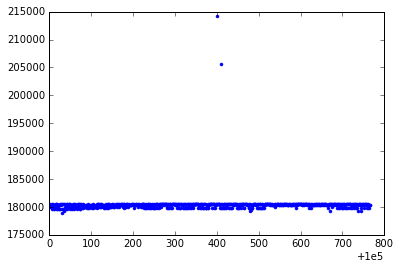

In [34]:
plt.plot(zip(*d2)[0], map(len, zip(*d2)[1]), '.')
plt.show()

In [35]:
d2d = zip(zip(*d2)[0], map(len, zip(*d2)[1]))

In [36]:
for n, d in d2d:
    if d > 200000:
        print n

100400
100410


In [42]:
dx, dy = 0.15, 0.05
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
y

array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
       [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
       [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
       ..., 
       [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
       [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95],
       [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])

IndexError: tuple index out of range

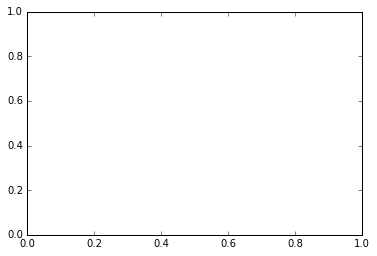

In [52]:
import matplotlib.pyplot as plt
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
plt.pcolormesh(x,y,z)
plt.show()

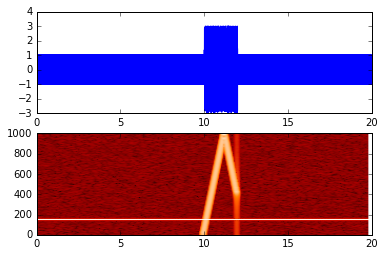

In [55]:
dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*150*t)
s2 = 2*np.sin(2*np.pi*400*t*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900,
                                cmap=plt.cm.gist_heat)
plt.show()

In [46]:
len(d1),len(d2),len(d3),len(d4)

(650, 653, 650, 840)

In [47]:
len(zip(d1,d2))

650

In [48]:
data = []
data.extend(d1)
data.extend(d2)
data.extend(d3)
data.extend(d4)

In [49]:
len(data)

2793

In [58]:
data[1280][0]

'INSERT INTO `app_genres` `appID`'

In [59]:
del data[1280]

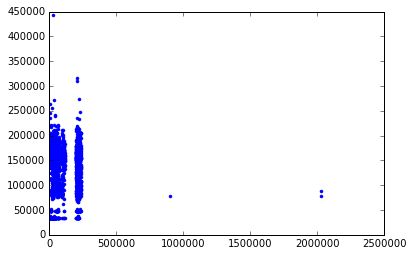

In [60]:
plt.plot(zip(*data)[0], map(len, zip(*data)[1]), '.')
plt.show()

In [204]:
len(data[0])

181815

In [205]:
del d1
del d2
del d3
del d4

In [68]:
data[3]

('61510',
 '<!DOCTYPE html>\r\n<html class=" responsive">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t\t\t<meta name="viewport" content="width=device-width,initial-scale=1">\r\n\t\t<meta name="theme-color" content="#171a21">\r\n\t\t<title>Save 75% on Age of Wonders II: The Wizard\'s Throne on Steam</title>\r\n\t<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">\r\n\r\n\t<link href="http://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=ful_LJT3NQYl" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=UweKo9dPVLqW" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=3YEnHE2flOXO" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic.com/public/css/v6/store.css?v=5x9rx7e-ZpBU" rel="stylesheet" type="text/css" >\n<link href="http://store.akamai.steamstatic

In [82]:
good1 = []
for n,d in data:
    if 'Release Date' in d and 'Hard Drive:' in d:
        good1.append((n,d))

In [83]:
len(good1)

1518

In [79]:
for n in zip(*data)[0]:
    if n not in zip(*good1)[0]:
        print n

55348
55344
55345
55347
55340
55343
23440
224420
340
7510
3990
94202
94200
32650
204140
55341
73060
60350
2310
21100
46480
214320
36700
97330
90530
80204
80202
80200
200891
200890
99200
42904
7860
227100
12120
214649
210077
225832
37000
70660
6200
113400
6800
9740
225831
216331
216332
3200
105415
36150
33670
225833
7670
232770
8160
223593
208374
31120
204106
95300
208371
47500
6220
213370
203701
400
214400
31100
214790
96300
206020
42929
97372
61230
213210
32640
2300
203700
224320
46490
200397
215820
240
32000
97320
97321
97322
97323
97324
2270
97326
97327
219130
63900
200170
57400
227000
36300
63380
7980
200550
9400
205250
210092
210093
12130
210096
210094
210036
45302
49311
204386
204385
204384
204382
204381
204380
44650
208540
208542
204388
203777
203776
203775
203774
203773
203772
12220
203770
70120
70650
6810
108726
208400
48137
3230
102840
10080
18440
211120
44320
211523
211522
12480
210073
210074
31110
67370
108100
27600
207670
110800
207815
15290
200230
207490
204760
23460
3820

In [214]:
f = open('steam.txt', 'a')
for l in good1:
    f.write(str(l))

In [215]:
good.extend(good1)

In [216]:
len(good)

1564

In [80]:
import datetime

In [81]:
datetime.datetime.strptime('21 Aug, 2012','%d %b, %Y')

datetime.datetime(2012, 8, 21, 0, 0)

In [ ]:
Release Date:</b> 21 Aug, 2012<br>
Storage:</strong> 8 GB svvasvsa\r

In [ ]:
b_in_GB = 1073741824
b_in_MB = 1048576
MB_in_GB = 1024

rel_stor = []
for index, (n, desc) in enumerate(good1):
    print n, index
    release = desc[desc.index('Release Date:</b>')+len('Release Date:</b>'):]
    release = release[:release.index('<br>')].strip()
#     print release
    try:
        release = datetime.datetime.strptime(release,'%d %b, %Y')
    except ValueError:
        try:
            release = datetime.datetime.strptime(release,'%b %Y')
        except ValueError:
            pass
    desc = desc.replace(' </strong>', '')
    desc = desc.replace('</strong>', '')
    desc = desc.replace(',', '.')
    storage = desc[desc.index('Hard Drive:')+len('Hard Drive:'):]
    if index == 69:
        print storage[:10]
#     print storage[:20]
    storage = storage.replace('+', '')
    if '-' in storage:
        print storage
        continue
    if 'GB' in storage[:10]:
        storage = storage[:storage.index('GB')]
        b_storage = float(storage)*MB_in_GB
    elif 'MB' in storage[:10]:
        storage = storage[:storage.index('MB')]
        b_storage = float(storage)
    else:
        print n, storage[:10]
    print type(release)
    if type(release) == datetime.datetime:
        rel_stor.append((release, b_storage, index))
#     print storage, b_storage

61510 0
 500MB hard disk<br>							 </li></ul>							</ul>
						</div>
															<div style="clear: both;"></div>
				</div>
					</div>
	</div>
	<script type="text/javascript">
		$J( function() {
			var $Tabs = $J('.sysreq_tab');
			var $Content = $J('.sysreq_content');

			$Tabs.click( function() {
				var $Tab = $J(this);
				$Tabs.removeClass('active');
				$Tab.addClass('active');

				$Content.removeClass('active');
				$Content.filter('[data-os='  $Tab.data('os')  ']').addClass('active');

				$Content.trigger('gamepage_autocollapse_expand');
			});
		} );
	</script>

									<div class="game_page_autocollapse" style="max-height: 400px;">
						<div id="game_area_legal">
							<p>Age of Wonders. the Age of Wonders logo. Triumph Studios and the Triumph Studios logo are trademarks of Triumph Studios B.V.. Copyright (c) 2010 Triumph Studios B.V.. All Rights Reserved.<br />
All other trademarks and trade names are properties of their respective owners.</p>
						</div>
					

In [222]:
b_in_GB = 1073741824
b_in_MB = 1048576
MB_in_GB = 1024

rel_stor = []
for index, (n, desc) in enumerate(good):
    release = desc[desc.index('Release Date:</b>')+len('Release Date:</b>'):]
    release = release[:release.index('<br>')].strip()
#     print release
    try:
        release = datetime.datetime.strptime(release,'%d %b, %Y')
    except ValueError:
        try:
            release = datetime.datetime.strptime(release,'%b %Y')
        except ValueError:
            pass
    storage = desc[desc.index('Storage:</strong>')+len('Storage:</strong>'):]
    if index == 69:
        print storage[:10]
#     print storage[:20]
    if 'GB' in storage[:10]:
        storage = storage[:storage.index('GB')]
        b_storage = float(storage)*MB_in_GB
    elif 'MB' in storage[:10]:
        storage = storage[:storage.index('MB')]
        b_storage = float(storage)
    else:
        print n, storage[:10]
    if type(release) == datetime.datetime:
        rel_stor.append((release, b_storage, index))
#     print storage, b_storage

 500 GB av


In [94]:
len(rel_stor)

0

In [224]:
rel_stor = sorted(rel_stor)

In [225]:
dates,sizes = zip(*rel_stor)[0], zip(*rel_stor)[1]

In [226]:
print len(dates)
print len(sizes)

1550
1550


(0, 50000.0)

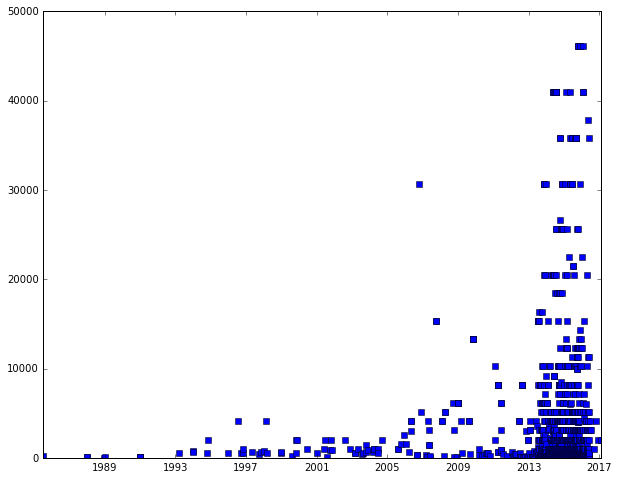

In [228]:
fig = plt.figure(figsize=[10,8])
plt.plot(zip(*rel_stor)[0], zip(*rel_stor)[1], 's')
plt.ylim(0, 5e4)
# plt.ylim(0, 1e10)

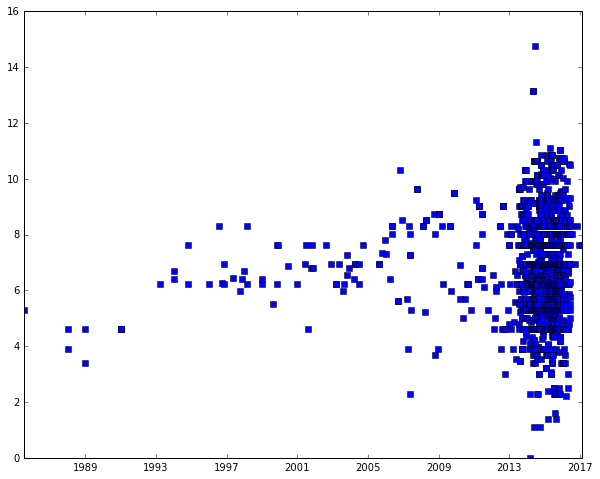

In [230]:
fig = plt.figure(figsize=[10,8])
plt.plot(zip(*rel_stor)[0], map(np.log, zip(*rel_stor)[1]), 's')
# plt.ylim(0, 5e4)
# plt.ylim(0, 1e10)

In [282]:
data = [1991.6538334862275, 0.06698808542478218,
    1992.4347656998673, 0.14700163190423154,
    1993.4700144582619, 3.5317607260019486,
    1994.505382306586, 13.473909071117305,
    1995.3227858111793, 21.75438074166982,
    1996.0130310433954, 28.382479638413315,
    1996.412756392245, 38.25950067825465,
    1996.9579500901548, 57.987491835827086,
    1997.5213645473002, 80.99603839905944,
    1998.1390244673983, 90.89538880070882,
    1998.665818771178, 97.50674067609611,
    1998.956457744474, 100.81520778401546,
    1999.5565221274671, 141.86029634784677,
    1999.9747064154117, 168.13265129538217,
    2000.4474636636157, 199.3286305216326,
    2000.829117115642, 214.1218327195861,
    2001.337958612528, 232.20675500410323,
    2001.8830629929905, 247.01670422341283,
    2002.4471026722665, 304.45154435448626,
    2003.029363110778, 365.16693989121893,
    2003.447815351064, 406.1934206535433,
    2003.9206619167153, 442.30744181805676,
    2004.4479028077312, 473.5090033847591,
    2004.8480151988524, 504.6975394904068,
    2005.1942393968095, 568.6674395106893,
    2005.5585354915902, 627.7211583728596,
    2006.0140544724782, 709.7350435143439,
    2006.4329533000007, 775.3517339679836,
    2006.7792965878875, 845.8790232392835,
    2007.1616645794916, 900.0165609433413,
    2007.4169040712009, 954.1410731863442,
    2007.70819803911, 993.5151811748595,
       2009.5, 2000,
       2010.5, 3000,
       2011.5, 4000,
       2014.7, 6000]


In [272]:
from datetime import datetime as dt
import time
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

(1985, 2017)

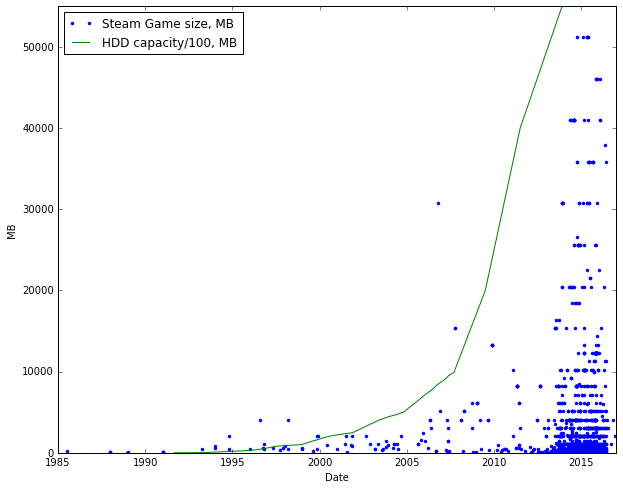

In [310]:
fig = plt.figure(figsize=[10,8])
plt.plot(map(toYearFraction, dates), sizes, '.', label='Steam Game size, MB')
plt.plot(data[0::2], map(lambda l: l*10, data[1::2]), label='HDD capacity/100, MB')
plt.ylim(-1, 5.5e4)
plt.ylabel('MB')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xlim(1985, 2017)
# plt.ylim(0, 1e10)

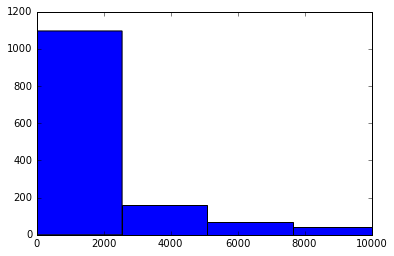

In [309]:
plt.hist(sizes, bins = 1000)
plt.xlim(0, 10000)
plt.show()

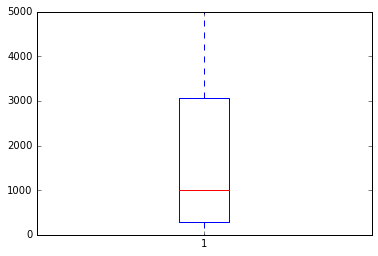

In [236]:
plt.boxplot(sizes)
plt.ylim(0, 5e3)
plt.show()

In [237]:
from heapq import nsmallest

In [241]:
nsmallest(15, sizes)

[1.0,
 3.0,
 3.0,
 4.0,
 4.0,
 5.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0]

In [276]:
HTML('<img src="http://www.go-rbcs.com/wp-content/uploads/2015/02/Figure-2-Hard-drive-cost-and-capacity-trends-940x911.png">')

In [148]:
for r,s,i in rel_stor:
    if s > 40000:
        print i

69
108
118
119
120
121
122
123
124


In [152]:
unique([good[119][0], good[118][0], good[120][0], good[121][0], good[122][0], good[123][0], good[124][0]])

array([301110, 301111, 301112, 301113, 301114, 301115, 301116])

In [13]:
without = 0
for num, html in data:
    if 'Query Help' in html:
        without += 1
print len(data) - without

664


In [16]:
disp = [d for d in data if 'Query Help' not in d[1]]

In [17]:
len(disp)

664

In [18]:
print disp[100][0]

1351


In [35]:
ddisp = []
for n, html in disp:
    for row in html.split('<br'):
        if row.count('&#177;') > 1: # &#177; == ±
            ddisp.append((n, html))
            break

In [37]:
len(ddisp)

278

In [40]:
print ['NGC' + str(n) for (n,_) in ddisp[0:20]]

['NGC80', 'NGC97', 'NGC194', 'NGC383', 'NGC410', 'NGC470', 'NGC499', 'NGC532', 'NGC584', 'NGC680', 'NGC691', 'NGC741', 'NGC742', 'NGC772', 'NGC813', 'NGC821', 'NGC890', 'NGC990', 'NGC1023', 'NGC1024']


In [43]:
ddisp[0][1]

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<html>\n <head>\n <title>Kinematical profiles</title> <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n <link rel="stylesheet" type="text/css" href="common.css" />\n <base target="_top" />\n <script>var pleinpot_version=\'8.12.2\'; var table_description=\'Kinematical profiles\';var table_name=\'a009\'</script>\n </head>\n <body>\n<PRE><br /><a href="G.cgi?c=m&f=f&o=search&p=[cat.ident=NGC0080]">NGC0080</a>       <a href="javascript:L(\'NGC0080\')">L</a> <a href="javascript:D(\'001834.7+220448\')">001834.7+220448</a> <a href="B.cgi?n=9&b=SP98" target="kin02">SP98</a>    S OR  180.0   0.0   -4.4    -13.0 &#177; 42.0 212.0 &#177; 22.0<br />                                <a href="B.cgi?n=9&b=SP98" target="kin02">SP98</a>    S OR  180.0   0.0   -9.0    -11.0 &#177; 37.0 249.0 &#177; 42.0<br />                                <a href="B.cgi?n=9&b=SP98" target="k

In [66]:
troubled = []
for n, html in ddisp:
    good = True
    for r in html.split('<br'):
        if '</a>' in r and '&#177;' in r:
            row = ' '.join(r[r.rfind('>')+1:].replace('&#177;', ' ').split())
            if row.strip():
                if len(row.split(' ')) != 9:
                    good = False
#                     print len(row.split(' '))
#                     print row
    if not good:
        troubled.append(n)
        print 'NGC'+str(n)

NGC1461
NGC2336
NGC2648
NGC2672
NGC2673
NGC2742
NGC2816
NGC2964
NGC3169
NGC3294
NGC3437
NGC4237
NGC4303
NGC4380
NGC4435
NGC4501
NGC4579
NGC4698
NGC5480
NGC5782
NGC5866
NGC5909
NGC5912
NGC6962
NGC7448
NGC7606


In [256]:
poz = u'Аня и Маша! С Днем рождения вас обеих! Пусть мы очень (никогда) редко видимся и я мало понимаю, \
что у вас в жизни происходит - но желаю вам всегда находить общий язык, держаться за друг дружку крепче, \
чем альпинисты в связке и творить всякое безумное интересное разноцветное добро :D Ну и встречаться хоть иногда ☼'

In [257]:
print poz

Аня и Маша! С Днем рождения вас обеих! Пусть мы очень (никогда) редко видимся и я мало понимаю, что у вас в жизни происходит - но желаю вам всегда находить общий язык, держаться за друг дружку крепче, чем альпинисты в связке и творить всякое безумное интересное разноцветное добро :D Ну и встречаться хоть иногда ☼


In [258]:
bag = poz.split(' ')
len(bag)

55

In [261]:
ann = []
mash = []
for w in bag:
    w1 = w[:len(w)/2] + '_'*len(w[len(w)/2:])
    w2 = '_'*len(w[:len(w)/2]) + w[len(w)/2:]
    ann.append(w1)
    mash.append(w2)

In [262]:
print ' '.join(ann)

А__ _ Ма___ _ Дн__ рожд____ в__ обе___ Пу___ м_ оч___ (ник_____ ре___ вид____ _ _ ма__ пони____ ч__ _ в__ _ жи___ проис_____ _ н_ же___ в__ все___ нахо____ об___ яз___ держ_____ з_ др__ дру___ кре____ ч__ альпи_____ _ свя___ _ тво____ вся___ безу____ интер_____ разноц______ до___ :_ Н_ _ встре______ хо__ ино___ _


In [263]:
print ' '.join(mash)

_ня и __ша! С __ем ____ения _ас ___их! __сть _ы __ень ____огда) __дко ___имся и я __ло ____маю, _то у _ас в __зни _____ходит - _о __лаю _ам ___гда ____дить __щий __ык, ____аться _а __уг ___жку ___пче, _ем _____нисты в ___зке и ___рить ___кое ____мное _____есное ______ветное __бро _D _у и _____чаться __ть ___гда ☼
